# 数据增强
前面我们已经讲了几个非常著名的卷积网络的结构，但是单单只靠这些网络并不能取得 state-of-the-art 的结果，现实问题往往更加复杂，非常容易出现过拟合的问题，而数据增强的方法是对抗过拟合问题的一个重要方法。

2012 年 AlexNet 在 ImageNet 上大获全胜，图片增强方法功不可没，因为有了图片增强，使得训练的数据集比实际数据集多了很多'新'样本，减少了过拟合的问题，下面我们来具体解释一下。

## 常用的数据增强方法
常用的数据增强方法如下：  
1.对图片进行一定比例缩放  
2.对图片进行随机位置的截取   
3.对图片进行随机的水平和竖直翻转  
4.对图片进行随机角度的旋转  
5.对图片进行亮度、对比度和颜色的随机变化

这些方法`tensorflow`都已经为我们内置在了`tf.image`里面

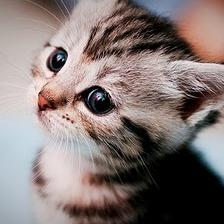

In [1]:
from PIL import Image

im = Image.open('./example_data/kitty.png')
im

In [2]:
import tensorflow as tf
import numpy as np

im = tf.constant(np.array(im, dtype=np.uint8))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 图片放缩
`tensorflow`内置函数**`tf.image.resize_images`**可以处理图片的放缩. 第一个参数是输入图片,第二个参数是目标大小, 格式是`[height, width]`. 第三个参数是`resize`时使用的方法, 默认是双先行插值, 可以在`tf.image.ResizeMethod`中选择

In [3]:
resized_im = tf.image.resize_images(im, [100, 200], method=tf.image.ResizeMethod.BILINEAR)

In [4]:
sess = tf.InteractiveSession()

before resize, shape: (224, 224, 4)
after resize, shape: (100, 200, 4)


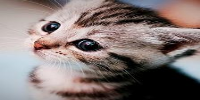

In [5]:
resized_fetch = resized_im.eval(session=sess)
print('before resize, shape: {}'.format(im.get_shape()))
print('after resize, shape: {}'.format(resized_im.get_shape()))
Image.fromarray(np.uint8(resized_fetch))

### 截取
随机位置截取能够提取出图片中局部的信息，使得网络接受的输入具有多尺度的特征，所以能够有较好的效果.

我们用**`tf.random_crop`**来实现. 第一个参数是输入图片, 第二个参数是截取区域的大小, 格式是`[height, width, channel]`, 第三个参数是随机种子.

还可以用**`tf.image.central_crop`**来实现中心区域裁剪. 第一个参数是输入图片, 第二个参数是截取区域占原图比例, 也就是说默认是长宽同比例裁剪的

In [6]:
tf.image.central_crop

<function tensorflow.python.ops.image_ops_impl.central_crop>

In [7]:
random_cropped_im1 = tf.random_crop(im, [100, 100, 3])
random_cropped_im2 = tf.random_crop(im, [150, 100, 3])
central_cropped_im = tf.image.central_crop(im, 1. / 3)

cropped1_size: (100, 100, 3)


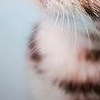

In [8]:
random_cropped1_fetch = random_cropped_im1.eval(session=sess)
print('cropped1_size: {}'.format(random_cropped_im1.get_shape()))
Image.fromarray(np.uint8(random_cropped1_fetch))

cropped2_size: (150, 100, 3)


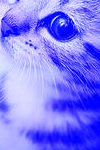

In [9]:
random_cropped2_fetch = random_cropped_im2.eval(session=sess)
print('cropped2_size: {}'.format(random_cropped_im2.get_shape()))
Image.fromarray(np.uint8(random_cropped2_fetch))

central_cropped_size: (76, 76, 4)


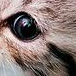

In [10]:
central_cropped_fetch = central_cropped_im.eval(session=sess)
print('central_cropped_size: {}'.format(central_cropped_fetch.shape))
Image.fromarray(np.uint8(central_cropped_fetch))

### 随机的水平和竖直方向翻转
对于上面这一张猫的图片，如果我们将它翻转一下，它仍然是一张猫，但是图片就有了更多的多样性，所以随机翻转也是一种非常有效的手段。在`tensorflow`中，随机翻转使用的是 `tf.image.random_flip_up_and_down` 和 `tf.image.random_flip_left_and_right`

In [11]:
h_flip = tf.image.random_flip_left_right(im)
v_flip = tf.image.random_flip_up_down(im)

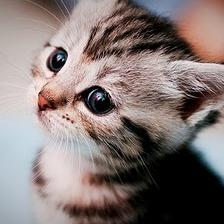

In [12]:
h_flip_fetch = h_flip.eval(session=sess)
Image.fromarray(np.uint8(h_flip_fetch))

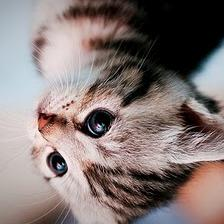

In [13]:
v_flip_fetch = v_flip.eval(session=sess)
Image.fromarray(np.uint8(v_flip_fetch))

### 随机角度旋转
一些角度的旋转仍然是非常有用的数据增强方式

`tensorflow`原生库中只有`tf.image.rot90`,也就是旋转90度, 我们可以用`tf.random_uniform`生成一个随机数结合`tensorflow`的`contrib`中提供了旋转的方法来完成

In [14]:
with tf.variable_scope('random_rotate'):
    angle = tf.random_uniform([], minval=-45, maxval=45, dtype=tf.float32, name='random_angle')
    random_rotated_im = tf.contrib.image.rotate(im, angle)

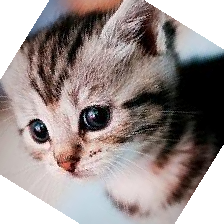

In [15]:
random_rotated_fetch = sess.run(random_rotated_im)
Image.fromarray(np.uint8(random_rotated_fetch))

### 亮度、对比度和颜色的变化
除了形状变化外，颜色变化又是另外一种增强方式，其中可以设置亮度变化，对比度变化和颜色变化等，在`tensorflow`中主要使用
- `tf.image.random_brightness`
- `tf.image.random_contrast`
- `tf.image.random_hue`

In [16]:
brightness_im = tf.image.random_brightness(im, max_delta=1)
contrast_im = tf.image.random_contrast(im, lower=0, upper=2)
hue_im = tf.image.random_hue(im, max_delta=0.5)

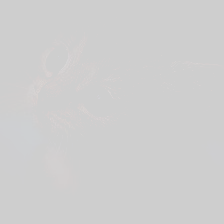

In [17]:
brightness_fetch = sess.run(brightness_im)
Image.fromarray(np.uint8(brightness_fetch))

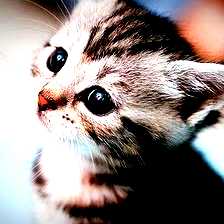

In [18]:
contrast_fetch = sess.run(contrast_im)
Image.fromarray(np.uint8(contrast_fetch))

In [19]:
hue_fetch = sess.run(hue_im)
Image.fromarray(np.uint8(hue_fetch))

InvalidArgumentError: input must have 3 channels but instead has 4 channels.
	 [[Node: adjust_hue/AdjustHue = AdjustHue[_device="/job:localhost/replica:0/task:0/device:GPU:0"](adjust_hue/convert_image, random_uniform_2)]]
	 [[Node: adjust_hue/convert_image_1/_59 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_25_adjust_hue/convert_image_1", tensor_type=DT_UINT8, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'adjust_hue/AdjustHue', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 760, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-84360cdc6e44>", line 3, in <module>
    hue_im = tf.image.random_hue(im, max_delta=0.5)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/image_ops_impl.py", line 1564, in random_hue
    return adjust_hue(image, delta)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/image_ops_impl.py", line 1596, in adjust_hue
    rgb_altered = gen_image_ops.adjust_hue(flt_image, delta)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_image_ops.py", line 181, in adjust_hue
    "AdjustHue", images=images, delta=delta, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): input must have 3 channels but instead has 4 channels.
	 [[Node: adjust_hue/AdjustHue = AdjustHue[_device="/job:localhost/replica:0/task:0/device:GPU:0"](adjust_hue/convert_image, random_uniform_2)]]
	 [[Node: adjust_hue/convert_image_1/_59 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_25_adjust_hue/convert_image_1", tensor_type=DT_UINT8, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


也可以把所有的图像增强操作放在一起

In [20]:
def im_aug(im):
    im = tf.image.resize_images(im, [120, 120])
    im = tf.image.random_flip_left_right(im)
    im = tf.random_crop(im, [96, 96, 3])
    im = tf.image.random_brightness(im, max_delta=0.5)
    im = tf.image.random_contrast(im, lower=0, upper=0.5)
    im = tf.image.random_hue(im, max_delta=0.5)
    
    return im

In [21]:
aug_im = im_aug(im)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

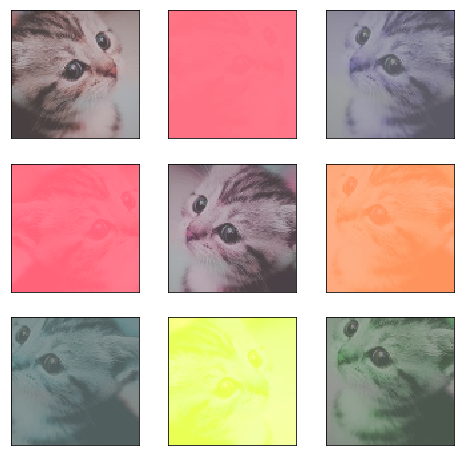

In [23]:
nrows = 3
ncols = 3
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        aug_fetch = np.uint8(sess.run(aug_im))
        figs[i][j].imshow(aug_fetch)
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

In [24]:
sess.close()

使用各种方法对图像进行增强之后的效果是什么呢?我们用之前的`resnet`模型进行一次尝试

In [27]:
from utils import cifar10_input

# 导入数据
train_imgs, train_labels, val_imgs, val_labels = cifar10_input.load_data(image_size=96)

In [28]:
import tensorflow.contrib.slim as slim
from utils import resnet

在这里我们定义训练和测试不同的增强方法, 但最后输出图片的大小必须相同

In [29]:
def train_aug(im, scope='train_aug'):
    with tf.variable_scope(scope):
        im = tf.image.resize_images(im, [120, 120])
        im = tf.image.random_flip_left_right(im)
        im = tf.random_crop(im, [96, 96, 3])
        im = tf.image.random_brightness(im, max_delta=0.5)
        im = tf.image.random_contrast(im, lower=0.0, upper=0.5)
        im = tf.image.random_hue(im, max_delta=0.5)
        im = tf.image.per_image_standardization(im)
        
        return im
    
def test_aug(im, scope='test_aug'):
    with tf.variable_scope(scope):
        im = tf.image.resize_images(im, [96, 96])
        im = tf.image.per_image_standardization(im)
        
        return im

前面的函数是对一张图片进行增强,如果要对一个`batch`中所有图片进行增强, 我们需要用到`tf.map_fn`函数, 这个函数和`python`的`map`函数功能非常类似, 都能够对一个类似列表的数据结构进行函数操作, 而且比较快

In [30]:
train_imgs_aug = tf.map_fn(lambda image: train_aug(image), train_imgs)
val_imgs_aug = tf.map_fn(lambda image: test_aug(image), val_imgs)

构建模型

In [31]:
is_training = tf.placeholder(tf.bool, name='is_training')    

In [32]:
with slim.arg_scope(resnet.resnet_arg_scope()):
    # 注意这里我们的输入是增强过后的图片
    train_out = resnet.resnet(train_imgs_aug, 10, is_training=is_training)
    val_out = resnet.resnet(val_imgs_aug, 10, is_training=is_training, reuse=True)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


定义`loss`和正确率

In [33]:
with tf.variable_scope('loss'):
    train_loss = tf.losses.sparse_softmax_cross_entropy(labels=train_labels, logits=train_out, scope='train')
    val_loss = tf.losses.sparse_softmax_cross_entropy(labels=val_labels, logits=val_out, scope='val')

In [34]:
with tf.name_scope('accuracy'):
    with tf.name_scope('train'):
        train_acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(train_out, axis=-1, output_type=tf.int32), train_labels), tf.float32))
    with tf.name_scope('val'):
        val_acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(val_out, axis=-1, output_type=tf.int32), val_labels), tf.float32))

构造训练

In [35]:
lr = 0.01

opt = tf.train.MomentumOptimizer(lr, momentum=0.9)

In [36]:
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    train_op = opt.minimize(train_loss)

开始训练

In [37]:
from utils.learning import train_with_bn

In [39]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_with_bn(sess, train_op, train_loss, train_acc, val_loss, val_acc, 10000, is_training)

sess.close()

[train]: step 0 loss = 2.3062 acc = 0.1094 (0.0153 / batch)
[val]: step 0 loss = 2.3074 acc = 0.1094
[train]: step 1000 loss = 2.0719 acc = 0.2969 (0.1384 / batch)
[train]: step 2000 loss = 1.9140 acc = 0.3594 (0.1380 / batch)
[train]: step 3000 loss = 1.3820 acc = 0.5469 (0.1389 / batch)
[train]: step 4000 loss = 1.2435 acc = 0.5312 (0.1395 / batch)
[val]: step 4000 loss = 1.3335 acc = 0.5469
[train]: step 5000 loss = 1.0562 acc = 0.6250 (0.1395 / batch)
[train]: step 6000 loss = 1.1656 acc = 0.5156 (0.1405 / batch)
[train]: step 7000 loss = 1.0543 acc = 0.6250 (0.1401 / batch)
[train]: step 8000 loss = 1.1518 acc = 0.5625 (0.1393 / batch)
[val]: step 8000 loss = 0.8054 acc = 0.7344
[train]: step 9000 loss = 1.0186 acc = 0.6719 (0.1373 / batch)
[train]: step 10000 loss = 1.2308 acc = 0.5625 (0.1406 / batch)
-------------------------Over all Result-------------------------
[TRAIN]: loss = 0.9106 acc = 0.6818
[VAL]: loss = 0.9386 acc = 0.6802


然后我们再重新尝试数据不进行增强的效果

In [40]:
# 首先重置计算图
tf.reset_default_graph()

然后我们需要重新构造整个计算图

In [42]:
train_imgs, train_labels, val_imgs, val_labels = cifar10_input.load_data(image_size=96)

In [43]:
is_training = tf.placeholder(tf.bool, name='is_training')    

In [44]:
with slim.arg_scope(resnet.resnet_arg_scope()):
    train_out = resnet.resnet(train_imgs, 10, is_training=is_training)
    val_out = resnet.resnet(val_imgs, 10, is_training=is_training, reuse=True)

In [45]:
with tf.variable_scope('loss'):
    train_loss = tf.losses.sparse_softmax_cross_entropy(labels=train_labels, logits=train_out, scope='train')
    val_loss = tf.losses.sparse_softmax_cross_entropy(labels=val_labels, logits=val_out, scope='val')

In [46]:
with tf.name_scope('accuracy'):
    with tf.name_scope('train'):
        train_acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(train_out, axis=-1, output_type=tf.int32), train_labels), tf.float32))
    with tf.name_scope('val'):
        val_acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(val_out, axis=-1, output_type=tf.int32), val_labels), tf.float32))

In [47]:
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    train_op = opt.minimize(train_loss)

In [48]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_with_bn(sess, train_op, train_loss, train_acc, val_loss, val_acc, 10000, is_training)

sess.close()

[train]: step 0 loss = 2.3173 acc = 0.0312 (0.0138 / batch)
[val]: step 0 loss = 2.2977 acc = 0.1562
[train]: step 1000 loss = 1.4021 acc = 0.4688 (0.0866 / batch)
[train]: step 2000 loss = 1.0971 acc = 0.5938 (0.0859 / batch)
[train]: step 3000 loss = 1.2853 acc = 0.6406 (0.0848 / batch)
[train]: step 4000 loss = 0.8846 acc = 0.6562 (0.0830 / batch)
[val]: step 4000 loss = 0.9258 acc = 0.6719
[train]: step 5000 loss = 1.3507 acc = 0.5938 (0.0858 / batch)
[train]: step 6000 loss = 0.6625 acc = 0.8281 (0.0874 / batch)
[train]: step 7000 loss = 0.9625 acc = 0.7188 (0.0887 / batch)
[train]: step 8000 loss = 0.8128 acc = 0.7031 (0.0863 / batch)
[val]: step 8000 loss = 1.6185 acc = 0.6875
[train]: step 9000 loss = 0.7777 acc = 0.7969 (0.0857 / batch)
[train]: step 10000 loss = 0.4993 acc = 0.8594 (0.0890 / batch)
-------------------------Over all Result-------------------------
[TRAIN]: loss = 0.4948 acc = 0.8439
[VAL]: loss = 1.4749 acc = 0.6865


从上面可以看出，对于训练集，不做数据增强跑 10000 次，准确率已经到了 82%，而使用了数据增强，跑 10 次准确率只有 68%，说明数据增强之后变得更难了。

而对于测试集，使用数据增强进行训练的时候，准确率会比不使用更高，因为数据增强提高了模型应对于更多的不同数据集的泛化能力，所以有更好的效果。